In [1]:
# @title
!pip install easydict
!pip install torchtuples

import os
import time
import torch
import torchtuples as tt
import numpy as np
import easydict
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold


In [2]:
#repair zw
!pip install scikit-learn

!pip install sklearn_pandas
!pip install -U scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold


In [3]:
import os
import time
import torch
import torchtuples as tt
import numpy as np
import easydict
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold

## Data Preprocessing

In [4]:
from google.colab import files
uploaded = files.upload()

Saving processdata.csv to processdata.csv


In [5]:
df = pd.read_csv('processdata.csv', encoding='latin-1')
data = df

In [6]:
date_columns = ['Date.of.Last.Contact', 'Date.of.Diagnostic']
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors='coerce')
has_na = data[date_columns].isna().any(axis=1)

if has_na.any():
#     max_last_contact_date = data['Date.of.Last.Contact'].max()
#     data['Survival_Time'] = (max_last_contact_date - data['Date.of.Diagnostic']).dt.days
    data['Survival_Time'] = (data['Date.of.Last.Contact'] - data['Date.of.Diagnostic']).dt.days
else:
    data['Survival_Time'] = (data['Date.of.Last.Contact'] - data['Date.of.Diagnostic']).dt.days

In [7]:
data['indicater'] = np.where(data['Date.of.Death'].isna(), 0, 1)
columns_to_drop = ['Date.of.Death', 'Date.of.Last.Contact', 'Date.of.Diagnostic']


data.drop(columns=columns_to_drop, inplace=True)

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler


columns_to_one_hot = ['RCBP.Name', 'Raca.Color', 'State.Civil', 'Code.Profession', 'Name.Occupation', 'Status.Address',
                      'City.Address', 'Description.of.Topography', 'Topography.Code', 'Morphology.Description',
                      'Code.of.Morphology', 'Description.of.Disease', 'Illness.Code', 'Diagnostic.means', 'Extension',
                      'Type.of.Death']

for column in columns_to_one_hot:
    top_9_values = data[column].value_counts().nlargest(9).index
    data[column] = data[column].where(data[column].isin(top_9_values), 'other')

data = pd.get_dummies(data, columns=columns_to_one_hot)

columns_to_binarize = ['Gender', 'Indicator.of.Rare.Case']

lb = LabelBinarizer()
for column in columns_to_binarize:
    data[column] = lb.fit_transform(data[column])

scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])


print(data.head())


   Gender       Age  Indicator.of.Rare.Case  Survival_Time  indicater  \
0       1  0.283019                       0              0          1   
1       1  0.490566                       0              0          1   
2       1  0.698113                       0              0          1   
3       1  0.556604                       0              0          1   
4       0  0.122642                       0           3959          0   

   RCBP.Name_RCBP BELO HORIZONTE  RCBP.Name_RCBP CAMPINAS-UNICAMP  \
0                          False                             True   
1                          False                             True   
2                          False                             True   
3                          False                             True   
4                          False                             True   

   RCBP.Name_RCBP DISTRITO FEDERAL  RCBP.Name_RCBP DRS BARRETOS  \
0                            False                        False   
1           

In [9]:
data.head()

,Gender,Age,Indicator.of.Rare.Case,Survival_Time,indicater,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,0,0.122642,0,3959,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [10]:
print(list(data.columns))

['Gender', 'Age', 'Indicator.of.Rare.Case', 'Survival_Time', 'indicater', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIME

In [11]:
# change the batch size from 1024 to 3222 to improve the performance
# created by Xinyu modified by Jingyan
args = easydict.EasyDict({
    "batch_size": 2048,
    "cuda": True, # should set it to be true when using gpu, otherwise data would be on two devices
    "lr": 0.05,
    "seed": 1111,
    "reduce_rate": 0.95,
    "epochs": 200,
    "clip": 5.0,
    "log_interval":10,
})

In [12]:
def cycle(iterable):
    while True:
        for x in iterable:
            yield x

In [13]:
device = torch.device("cuda" if args.cuda else "cpu")
dtype = torch.FloatTensor
if torch.cuda.is_available() and args.cuda:
    dtype = torch.cuda.FloatTensor

np.random.seed(1234)
_ = torch.manual_seed(123)

In [14]:
print(device)

cuda


In [15]:
from sklearn import preprocessing

In [16]:
data[data['indicater']==1]

,Gender,Age,Indicator.of.Rare.Case,Survival_Time,indicater,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
5,0,0.754717,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14750,0,0.613208,0,1475,1,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14751,1,0.528302,0,1302,1,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14752,1,0.122642,0,936,1,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
14753,1,0.773585,0,420,1,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [17]:
X = data.drop(['Survival_Time', 'indicater'], axis=1)
time_all = data['Survival_Time'].values
event_all = data['indicater'].values

In [18]:
# X_normalize
X.head(5)

,Gender,Age,Indicator.of.Rare.Case,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,RCBP.Name_RCBP MANAUS,RCBP.Name_RCBP MATO GROSSO (INTERIOR),...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,0,0.122642,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [19]:
max_time = data['Survival_Time'].max()
max_time

7408

In [20]:
print(list(X.columns))

['Gender', 'Age', 'Indicator.of.Rare.Case', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIMENTA??O DE CARGAS   \t', 'Name.

In [21]:
check = pd.DataFrame(columns=['Gender', 'Age', 'Indicator.of.Rare.Case', 'Survival_Time', 'indicater', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIMENTA??O DE CARGAS   \t', 'Name.Occupation_GERENTES DE PRODU??O E OPERA??ES  \t', 'Name.Occupation_MEMBROS SUPERIORES DO PODER LEGISLATIVO, EXECUTIVO E JUDICI?RIO   \t', 'Name.Occupation_SEM INFORMA??O\t', 'Name.Occupation_TRABALHADORES AGR?COLAS   \t', 'Name.Occupation_TRABALHADORES DA CONSTRU??O CIVIL E OBRAS P?BLICAS\t', 'Name.Occupation_TRABALHADORES DOS SERVI?OS DOM?STICOS EM GERAL\t', 'Name.Occupation_TRABALHADORES NOS SERVI?OS DE ADMINISTRA??O, CONSERVA??O E MANUTEN??O DE EDIF?CIOS E LOGRADOUROS  \t', 'Name.Occupation_TRABALHADORES NOS SERVI?OS DE EMBELEZAMENTO E CUIDADOS PESSOAIS   \t', 'Name.Occupation_other', 'Status.Address_AMAZONAS', 'Status.Address_CEAR?', 'Status.Address_DISTRITO FEDERAL', 'Status.Address_MATO GROSSO ', 'Status.Address_MINAS GERAIS', 'Status.Address_RIO DE JANEIRO', 'Status.Address_RIO GRANDE DO NORTE', 'Status.Address_RIO GRANDE DO SUL', 'Status.Address_S?O PAULO', 'Status.Address_other', 'City.Address_BARRETOS', 'City.Address_BEBEDOURO', 'City.Address_BRAS?LIA', 'City.Address_CAMPINAS', 'City.Address_COLINA', 'City.Address_GUA?RA', 'City.Address_MONTE AZUL PAULISTA', 'City.Address_OL?MPIA', 'City.Address_VIRADOURO', 'City.Address_other', 'Description.of.Topography_COLO DO UTERO, SOE', 'Description.of.Topography_ESTOMAGO, SOE', 'Description.of.Topography_LOCALIZACAO PRIMARIA DESCONHECIDA, SOE', 'Description.of.Topography_MAMA , SOE', 'Description.of.Topography_MEDULA OSSEA', 'Description.of.Topography_PELE DE OUTRAS PARTES DA FACE', 'Description.of.Topography_PELE DO MEMBRO SUPERIOR E DO OMBRO', 'Description.of.Topography_PROSTATA, SOE', 'Description.of.Topography_PULMAO, SOE', 'Description.of.Topography_other', 'Topography.Code_C169', 'Topography.Code_C349', 'Topography.Code_C421', 'Topography.Code_C443', 'Topography.Code_C446', 'Topography.Code_C509', 'Topography.Code_C539', 'Topography.Code_C619', 'Topography.Code_C809', 'Topography.Code_other', 'Morphology.Description_ADENOCARCINOMA TUBULAR', 'Morphology.Description_ADENOCARCINOMA, SOE', 'Morphology.Description_CARCINOMA BASO CELULAR, SOE', 'Morphology.Description_CARCINOMA BASOCELULAR, SOE', 'Morphology.Description_CARCINOMA DE CELULAS ESCAMOSAS, SOE', 'Morphology.Description_CARCINOMA DUCTAL INFILTRANTE', 'Morphology.Description_CARCINOMA ESCAMOCELULAR, SOE', 'Morphology.Description_NEOPLASIA MALIGNA', 'Morphology.Description_NEOPLASMA MALIGNO', 'Morphology.Description_other', 'Code.of.Morphology_80003', 'Code.of.Morphology_80703', 'Code.of.Morphology_80903', 'Code.of.Morphology_81403', 'Code.of.Morphology_82113', 'Code.of.Morphology_85003', 'Code.of.Morphology_95903', 'Code.of.Morphology_97323', 'Code.of.Morphology_98613', 'Code.of.Morphology_other', 'Description.of.Disease_BRONQUIOS OU PULMOES, SOE', 'Description.of.Disease_COLO DO UTERO, SOE', 'Description.of.Disease_ESTOMAGO, SOE', 'Description.of.Disease_LOCALIZACAO PRIMARIA DESCONHECIDA', 'Description.of.Disease_MAMA , SOE', 'Description.of.Disease_PELE DE OUTRAS PARTES DA FACE', 'Description.of.Disease_PELE DO MEMBRO SUPERIOR E DO OMBRO', 'Description.of.Disease_PELE DO TRONCO', 'Description.of.Disease_PROSTATA', 'Description.of.Disease_other', 'Illness.Code_C169', 'Illness.Code_C349', 'Illness.Code_C443', 'Illness.Code_C445', 'Illness.Code_C446', 'Illness.Code_C509', 'Illness.Code_C61', 'Illness.Code_C80', 'Illness.Code_C859', 'Illness.Code_other', 'Diagnostic.means_CITOLOGIA', 'Diagnostic.means_CL?NICO', 'Diagnostic.means_HISTOLOGIA DO TUMOR PRIM?RIO', 'Diagnostic.means_PESQUISA', 'Diagnostic.means_SDO', 'Diagnostic.means_other', 'Extension_IN SITU', 'Extension_LOCALIZADO', 'Extension_MET?STASE', 'Extension_N?O SE APLICA', 'Type.of.Death_C?NCER', 'Type.of.Death_N?O C?NCER', 'Type.of.Death_other'])

columns = list(check.columns)
for i, c in enumerate(columns):
    if 'extension' in c.lower():
        print(f"{c} - {i}")

for i, c in enumerate(columns):
    if 'illness.code' in c.lower():
        print(f"{c} - {i}")

Extension_IN SITU - 133
Extension_LOCALIZADO - 134
Extension_MET?STASE - 135
Extension_N?O SE APLICA - 136
Illness.Code_C169 - 117
Illness.Code_C349 - 118
Illness.Code_C443 - 119
Illness.Code_C445 - 120
Illness.Code_C446 - 121
Illness.Code_C509 - 122
Illness.Code_C61 - 123
Illness.Code_C80 - 124
Illness.Code_C859 - 125
Illness.Code_other - 126


Data divided into MTL form

In [22]:
import numpy as np

# Take the maximum time and divide it into any number of intervals
Tmax = 7500
num_intervals = 7

intervals = [(i * (Tmax // num_intervals), (i + 1) * (Tmax // num_intervals)) for i in range(num_intervals)]

Y = np.zeros((len(time_all), num_intervals), dtype=np.int_)

for i, time_val in enumerate(time_all):
    for j, (left, right) in enumerate(intervals):
        if time_val > right or (left < time_val <= right):
            Y[i, j] = 1

Y = torch.Tensor(Y)

print(Y.shape)

torch.Size([14755, 7])


In [23]:
Y

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])

In [24]:
# Creat mask matrix
W = np.zeros((len(time_all), num_intervals), dtype=np.int_)

for i, (time_val, event_val) in enumerate(zip(time_all, event_all)):
    for j, (left, right) in enumerate(intervals):
        if event_val == 0 and time_val < left:
            W[i, j] = 0
        else:
            W[i, j] = 1

W = torch.Tensor(W)

In [25]:
print(W.shape)
# So far all the codes are done by Xinyu

torch.Size([14755, 7])


## Define and Apply the DataLoader
- Introduced the dataloader to deal with the dataset, which would be helpful in the training and testing steps

In [26]:
# Jingyan adds the dataloader
from torch.utils.data import Dataset, DataLoader, random_split

class MultiTaskDataset(Dataset):
    def __init__(self, data, targets, masks, event_all):
        self.data = data
        self.targets = targets
        self.masks = masks
        self.event_all = event_all

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], [self.targets[i][idx] for i in range(len(self.targets))], [self.masks[i][idx] for i in range(len(self.masks))], self.event_all[idx]


In [27]:
for col in X.columns:       # modified by Ali Sam. (when I try to run the code, the transformation to tensor gives an error of data type, so I have converted the boolean coloumns to int dtype first)
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)
X_use = torch.tensor(X.values, dtype=torch.float32)
X_use.shape

torch.Size([14755, 138])

In [28]:
Y_transform = [Y[:, i:i+1] for i in range(Y.size(1))]
print(Y_transform[0].shape)
W_transform = [W[:, i:i+1] for i in range(W.size(1))]
print(W_transform[0].shape)

torch.Size([14755, 1])
torch.Size([14755, 1])


In [29]:
#Xinyu
full_dataset = MultiTaskDataset(X_use, Y_transform, W_transform, event_all)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=True, drop_last=True)

In [30]:
# created by Jingyan to check the data shape before training
for x, y, w, e in train_loader:
    print(x.shape)
    print(len(y), y[0].shape)
    print(len(w), w[0].shape)
    print(e.shape)
    in_features = x.shape[1]
    out_features = len(y)
    break

torch.Size([2048, 138])
7 torch.Size([2048, 1])
7 torch.Size([2048, 1])
torch.Size([2048])


In [31]:
out_features

7

In [32]:
for x, y, w, e in test_loader:
    print(x.shape)
    print(len(y), y[0].shape)
    print(len(w), w[0].shape)
    print(e.shape)
    break

torch.Size([2048, 138])
7 torch.Size([2048, 1])
7 torch.Size([2048, 1])
torch.Size([2048])


In [33]:
e_train = []
for x, y, w, e in train_loader:
  e_train.append(e)

event_train = torch.cat(e_train, dim=0)

In [34]:
event_train.shape

torch.Size([10240])

## Original Code (comment out)

In [35]:
# num_columns = Y_train.shape[1]
# Y_train_cols = []
# for i in range(num_columns):
#     col = Y_train[:, i]
#     var_name = 'Y' + str(i+1)
#     locals()[var_name] = col
#     Y_train_cols.append(locals()[var_name])

# num_test_columns = Y_test.shape[1]
# Y_test_cols = []
# for i in range(num_test_columns):
#     col = Y_test[:, i]
#     var_name = 'Y' + str(i+1)
#     locals()[var_name] = col
#     Y_test_cols.append(locals()[var_name])

In [36]:
# num_columns = W_train.shape[1]

# W_train_cols = []

# for i in range(num_columns):
#   col = W_train[:, i]
#   var_name = 'W' + str(i+1)
#   locals()[var_name] = col
#   W_train_cols.append(locals()[var_name])

# num_test_columns = W_test.shape[1]

# W_test_cols = []

# for i in range(num_test_columns):
#   col = W_test[:, i]
#   var_name = 'W' + str(i+1)
#   locals()[var_name] = col
#   W_test_cols.append(locals()[var_name])

In [37]:
# print(W_train_cols[1].shape)
# print(W_test_cols[1].shape)
# print(Y_train_cols[1].shape)
# print(Y_test_cols[1].shape)

## Model
- Changed the loss function to match the data format using dataloader

In [38]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Made by Xinyu and modified by Dr.Li and Jingyan
class MultiTaskModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(MultiTaskModel, self).__init__()
        self.num_tasks = out_features
        self.input_features = in_features

        self.shared_layers = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1),

            nn.Linear(128, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1),

            nn.Linear(128, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1)
        )
# A Classic Multi Task Learning Framework
        self.task_layers = nn.ModuleList([nn.Linear(128, 1) for _ in range(out_features)])#after your papaer I decided to use MTL to solve this prob

# This forward propagation logic defines the chain propagation of our idea
    def forward(self, x):
        shared_output = self.shared_layers(x)
        task_outputs = []
        for i, task_layer in enumerate(self.task_layers):
            if i == 0:
                task_output = torch.sigmoid(task_layer(shared_output))
            else:
                task_output = torch.sigmoid(task_layer(shared_output)) * task_outputs[-1]
            task_outputs.append(task_output)

        return task_outputs# Here I difined the S(x)


    # def custom_loss(self, task_outputs, Y_train_cols, W_train_cols):
    #     loss = 0
    #     for i, task_output in enumerate(task_outputs):
    #         task_target = Y_train_cols[i].unsqueeze(1)
    #         task_mask = W_train_cols[i].unsqueeze(1)
    #         task_loss = F.binary_cross_entropy_with_logits(task_output, task_target.float(), reduction='none')
    #         task_loss = task_loss * task_mask.float()
    #         loss += task_loss.sum() / task_mask.sum()
    #     return loss#There are how I use mask matrix W to control the loss function

# Modified by Jingyan
    def custom_loss(self, task_outputs, targets, masks):
        loss = 0
        for i, task_output in enumerate(task_outputs):
            task_target = targets[i]
            task_mask = masks[i]
            task_loss = F.binary_cross_entropy(task_output, task_target.float(), reduction='none')
            task_loss = task_loss * task_mask.float()
            loss += task_loss.sum() / task_mask.sum()
        return loss

## TASK 2

In [39]:
!git clone https://github.com/suinleelab/attributionpriors.git

Cloning into 'attributionpriors'...
remote: Enumerating objects: 280, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 280 (delta 16), reused 13 (delta 13), pack-reused 259
Receiving objects: 100% (280/280), 97.55 MiB | 27.00 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [ ]:
#Zw
from tqdm import tqdm
import torch
import sys
sys.path.append('/content/attributionpriors/attributionpriors')
from pytorch_ops import AttributionPriorExplainer
class MutltiTaskModel(nn.Module):
  def __init__(self,in_features,out_features):
    super(MultiTaskModel,self).__init__()
    self.num_tasks=out_features
    self.input_features=in_features
    self.shared_layers=nn.Sequebrial(
        nn,Linear(in_features,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1),

        nn,Linear(128,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1),

        nn,Linear(128,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1)
    )

    self.task_layers=nn.ModuleList([nn.Linear(128,1) for _ in range(out_features)])

  def forward(self,x):
    shared_output=self.shared_layers(x)
    task_ouputs=[]
    for i,task_layer in enumerate(self.task_layers):
      if i==0:
        task_output=torch.sigmoid(task_layer(shared_output))
      else:
        task_output=torch.sigmoid(task_layer(shared_ouput))*task_outputs[-1]
      task_outputs.append(task_output)
    return task_outputs

  def custom_loss(self,task_outputs,targets,maskes):
    loss=0
    for i,task_output in enumerate(task_outputs):
      task_target=targets[i]
      task_mask=masks[i]
      task_loss=F.binary_cross_entropy(task_output,task_target.float(),reduction='none')
      task_loss=task_loss*task_mask.float()
      loss+=task_loss.sum()/task_mask.sum()

    return loss

##Task 2 Training

In [ ]:
#zw
Am=AttributionPriorExplainer(train_dataset,args.batch_size)
model=MultiTaskModel(in_features,out_features).to(device)
model.train()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

loss_2=[]
epoches=150
for epoch in range(epoches):
  total_loss=0
  progress=tqdm(enumerate(train_loader),total=len(train_loader),desc=f"Epoch {epoch+1}/{epoches}")
  for batch,(x_train,targets,masks,event_train) in progress:
    x_train=x_train.to(device).float()
    targets=[target.to(device).float() for target in targets]
    masks=[mask.to(device).float() for mask in masks]
    optimizer.zero_grad()
    task = model(x_train)
    expected_g = Am.shap_values(model,x_train)
    print(torch.all(expected_g==0))
    interested=expected_g[:,[1, 133, 134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]
    non_interested=expected_g[:,[i for i in range(expected_g.shape[1]) if i not in [1,133,134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]]

    t_regress=0
    for i in range(expected_g.shape[1]):
      t_regress=t_regress+torch.norm(expected_g[:,i],p=2)
    avg_reg=t_regress/expected_g.shape[1]

    t_in_regress=0
    for i in range(interested.shape[1]):
      in_regress=torch.norm(interested[:,i],p=2)
      t_in_regress=F.relu(avg_reg-in_regress)

    t_notin_regress=0
    for i in range(not_interested.shape[1]):
      t_notin_regress+=torch.norm(not_interested[:,i],p=2)

    l1=2.2
    l2=0.2
    loss=model.custom_loss(task,targets,masks)+l1*t_in_regress+l2*t_notin_regress
    loss.backward()
    optimizer.step()
    total_loss+=loss.item()
    progress.set_postfix({'Loss':loss.item()})

  avgloss=total_loss/len(train_loader)
  loss_2.append(avgloss)
  print(f"Eng of Epoch {epoch+1},average loss:{avgloss:.4f}")
print("Task complete")

Epoch 1/150:   0%|          | 0/5 [00:00<?, ?it/s]


AttributeError: 'list' object has no attribute 'size'

In [40]:
# Import the attribution package by Jingyan
# Please use the package I modified
# I modified the '/content/attributionpriors/attributionpriors/pytorch_ops.py' file
# to accomodate for multitask learning usecase
# You can see the modifications in the github if interested
!git clone https://github.com/jingyanjiang/attributionpriors_multitask.git
!pip install ./attributionpriors_multitask

# This github is important, you may look into this to modify CF

Cloning into 'attributionpriors_multitask'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 288 (delta 20), reused 13 (delta 13), pack-reused 259
Receiving objects: 100% (288/288), 97.56 MiB | 31.52 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Processing ./attributionpriors_multitask
  Preparing metadata (setup.py) ... done
  Created wheel for attributionpriors: filename=attributionpriors-0.1.3-py3-none-any.whl size=20761 sha256=ea22f7578b77b41e5e387f7f76d72bd4ec619759de77948f4944e70ebbe291b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-j30nqf5e/wheels/d0/73/65/94649507c3566b074ff62820c51c5bf621ee86db106e8ee876
Successfully built attributionpriors


##Defining Model and Training
- Rewrote the model defining and  training part for Task 2

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import sys
sys.path.append('/content/attributionpriors_multitask/attributionpriors')
import torch.cuda as cuda
from attributionpriors.pytorch_ops import AttributionPriorExplainer

class MultiTaskModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(MultiTaskModel, self).__init__()
        self.num_tasks = out_features
        self.input_features = in_features
        self.shared_layers = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.BatchNorm1d(128),  # added batch normalization layer
            nn.ReLU(),
            nn.AlphaDropout(0.1),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),  # added batch normalization layer
            nn.ReLU(),
            nn.AlphaDropout(0.1),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),  # added batch normalization layer
            nn.ReLU(),
            nn.AlphaDropout(0.1)
        )
        self.task_layers = nn.ModuleList([nn.Linear(128, 1) for _ in range(out_features)])


    def forward(self, x):
        shared_output = self.shared_layers(x)
        task_outputs = []
        for i, task_layer in enumerate(self.task_layers):
            if i == 0:
                task_output = torch.sigmoid(task_layer(shared_output))
            else:
                task_output = torch.sigmoid(task_layer(shared_output)) * task_outputs[-1]
            task_outputs.append(task_output)
        return task_outputs


    def custom_loss(self, task_outputs, targets, masks, attributions, lambda_smooth):
        loss = 0
        for i, task_output in enumerate(task_outputs):
            task_target = targets[i]
            task_mask = masks[i]
            task_loss = F.binary_cross_entropy(task_output, task_target.float(), reduction='none')
            task_loss = task_loss * task_mask.float()
            loss += task_loss.sum() / task_mask.sum()

        # Temporal smoothness regularization
        smoothness_cost = 0
        for i in range(len(attributions) - 1):
            smoothness_cost += torch.norm(attributions[i + 1] - attributions[i], p=1)
        loss += lambda_smooth * smoothness_cost

        return loss




device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskModel(in_features, out_features).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)
num_epochs = 250
loss_records = []


APExp = AttributionPriorExplainer(train_dataset, args.batch_size, k=1)

for epoch in range(num_epochs):
    total_loss = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}")
    for batch_idx, (X_train, targets, masks,event_train) in progress_bar:
        X_train = X_train.to(device)
        targets = [target.to(device) for target in targets]
        masks = [mask.to(device) for mask in masks]

        optimizer.zero_grad()
        task_outputs_ = model(X_train)


        expected_gradients = APExp.shap_values(model, X_train)

        loss = model.custom_loss(task_outputs_, targets, masks, expected_gradients, lambda_smooth=0.0001)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix({'Loss': loss.item()})

    avg_loss = total_loss / len(train_loader)
    loss_records.append(avg_loss)
    print(f'End of Epoch {epoch + 1}, Average Loss: {avg_loss:.4f}')

print('Training completed')

Epoch 1/250: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s, Loss=3.86]


End of Epoch 1, Average Loss: 3.8682


Epoch 2/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.84]


End of Epoch 2, Average Loss: 3.8697


Epoch 3/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.85]


End of Epoch 3, Average Loss: 3.8980


Epoch 4/250: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s, Loss=4.01]


End of Epoch 4, Average Loss: 3.8910


Epoch 5/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.86]


End of Epoch 5, Average Loss: 3.8894


Epoch 6/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.79]


End of Epoch 6, Average Loss: 3.8565


Epoch 7/250: 100%|██████████| 5/5 [00:04<00:00,  1.11it/s, Loss=3.94]


End of Epoch 7, Average Loss: 3.8916


Epoch 8/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.91]


End of Epoch 8, Average Loss: 3.9135


Epoch 9/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.98]


End of Epoch 9, Average Loss: 3.8759


Epoch 10/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.92]


End of Epoch 10, Average Loss: 3.8730


Epoch 11/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.87]


End of Epoch 11, Average Loss: 3.8318


Epoch 12/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.77]


End of Epoch 12, Average Loss: 3.8939


Epoch 13/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.91]


End of Epoch 13, Average Loss: 3.8300


Epoch 14/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.82]


End of Epoch 14, Average Loss: 3.8860


Epoch 15/250: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s, Loss=3.82]


End of Epoch 15, Average Loss: 3.8617


Epoch 16/250: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s, Loss=3.84]


End of Epoch 16, Average Loss: 3.8835


Epoch 17/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=4.18]


End of Epoch 17, Average Loss: 3.8653


Epoch 18/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.73]


End of Epoch 18, Average Loss: 3.8693


Epoch 19/250: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=3.98]


End of Epoch 19, Average Loss: 3.8766


Epoch 20/250: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s, Loss=4]


End of Epoch 20, Average Loss: 3.8648


Epoch 21/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.87]


End of Epoch 21, Average Loss: 3.8540


Epoch 22/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.89]


End of Epoch 22, Average Loss: 3.8837


Epoch 23/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.94]


End of Epoch 23, Average Loss: 3.8504


Epoch 24/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.9]


End of Epoch 24, Average Loss: 3.8858


Epoch 25/250: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s, Loss=3.71]


End of Epoch 25, Average Loss: 3.8507


Epoch 26/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.7]


End of Epoch 26, Average Loss: 3.8459


Epoch 27/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.9]


End of Epoch 27, Average Loss: 3.8300


Epoch 28/250: 100%|██████████| 5/5 [00:04<00:00,  1.02it/s, Loss=3.77]


End of Epoch 28, Average Loss: 3.8526


Epoch 29/250: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s, Loss=3.85]


End of Epoch 29, Average Loss: 3.8495


Epoch 30/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.82]


End of Epoch 30, Average Loss: 3.8050


Epoch 31/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.92]


End of Epoch 31, Average Loss: 3.8812


Epoch 32/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.93]


End of Epoch 32, Average Loss: 3.8344


Epoch 33/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.89]


End of Epoch 33, Average Loss: 3.8545


Epoch 34/250: 100%|██████████| 5/5 [00:04<00:00,  1.14it/s, Loss=3.89]


End of Epoch 34, Average Loss: 3.8670


Epoch 35/250: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s, Loss=3.89]


End of Epoch 35, Average Loss: 3.8321


Epoch 36/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.95]


End of Epoch 36, Average Loss: 3.9031


Epoch 37/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.76]


End of Epoch 37, Average Loss: 3.8331


Epoch 38/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.64]


End of Epoch 38, Average Loss: 3.8453


Epoch 39/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.78]


End of Epoch 39, Average Loss: 3.8370


Epoch 40/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.82]


End of Epoch 40, Average Loss: 3.8358


Epoch 41/250: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s, Loss=3.87]


End of Epoch 41, Average Loss: 3.8778


Epoch 42/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.76]


End of Epoch 42, Average Loss: 3.8293


Epoch 43/250: 100%|██████████| 5/5 [00:04<00:00,  1.14it/s, Loss=3.82]


End of Epoch 43, Average Loss: 3.8587


Epoch 44/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.87]


End of Epoch 44, Average Loss: 3.8525


Epoch 45/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.74]


End of Epoch 45, Average Loss: 3.8276


Epoch 46/250: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s, Loss=3.8]


End of Epoch 46, Average Loss: 3.8102


Epoch 47/250: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s, Loss=3.84]


End of Epoch 47, Average Loss: 3.8237


Epoch 48/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.85]


End of Epoch 48, Average Loss: 3.8538


Epoch 49/250: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s, Loss=3.77]


End of Epoch 49, Average Loss: 3.8280


Epoch 50/250: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s, Loss=4.07]


End of Epoch 50, Average Loss: 3.8531


Epoch 51/250: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s, Loss=3.79]


End of Epoch 51, Average Loss: 3.8487


Epoch 52/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.77]


End of Epoch 52, Average Loss: 3.8244


Epoch 53/250: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s, Loss=3.96]


End of Epoch 53, Average Loss: 3.8217


Epoch 54/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.84]


End of Epoch 54, Average Loss: 3.8413


Epoch 55/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.92]


End of Epoch 55, Average Loss: 3.8306


Epoch 56/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.91]


End of Epoch 56, Average Loss: 3.8568


Epoch 57/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.83]


End of Epoch 57, Average Loss: 3.8075


Epoch 58/250: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s, Loss=3.93]


End of Epoch 58, Average Loss: 3.8399


Epoch 59/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.79]


End of Epoch 59, Average Loss: 3.8143


Epoch 60/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.92]


End of Epoch 60, Average Loss: 3.8368


Epoch 61/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.87]


End of Epoch 61, Average Loss: 3.8111


Epoch 62/250: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=3.81]


End of Epoch 62, Average Loss: 3.8369


Epoch 63/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=4.08]


End of Epoch 63, Average Loss: 3.8440


Epoch 64/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.87]


End of Epoch 64, Average Loss: 3.8383


Epoch 65/250: 100%|██████████| 5/5 [00:04<00:00,  1.13it/s, Loss=3.75]


End of Epoch 65, Average Loss: 3.8122


Epoch 66/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.87]


End of Epoch 66, Average Loss: 3.8014


Epoch 67/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.78]


End of Epoch 67, Average Loss: 3.7994


Epoch 68/250: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s, Loss=3.97]


End of Epoch 68, Average Loss: 3.8457


Epoch 69/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.9]


End of Epoch 69, Average Loss: 3.8597


Epoch 70/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.76]


End of Epoch 70, Average Loss: 3.8218


Epoch 71/250: 100%|██████████| 5/5 [00:04<00:00,  1.00it/s, Loss=3.78]


End of Epoch 71, Average Loss: 3.8073


Epoch 72/250: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s, Loss=3.72]


End of Epoch 72, Average Loss: 3.7916


Epoch 73/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.88]


End of Epoch 73, Average Loss: 3.8445


Epoch 74/250: 100%|██████████| 5/5 [00:04<00:00,  1.10it/s, Loss=3.88]


End of Epoch 74, Average Loss: 3.8078


Epoch 75/250: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s, Loss=3.7]


End of Epoch 75, Average Loss: 3.8013


Epoch 76/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.73]


End of Epoch 76, Average Loss: 3.8150


Epoch 77/250: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=3.64]


End of Epoch 77, Average Loss: 3.7954


Epoch 78/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.8]


End of Epoch 78, Average Loss: 3.8077


Epoch 79/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.81]


End of Epoch 79, Average Loss: 3.8104


Epoch 80/250: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s, Loss=4.04]


End of Epoch 80, Average Loss: 3.8119


Epoch 81/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.83]


End of Epoch 81, Average Loss: 3.8191


Epoch 82/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.79]


End of Epoch 82, Average Loss: 3.7980


Epoch 83/250: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s, Loss=3.73]


End of Epoch 83, Average Loss: 3.8154


Epoch 84/250: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s, Loss=3.87]


End of Epoch 84, Average Loss: 3.8318


Epoch 85/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.72]


End of Epoch 85, Average Loss: 3.7983


Epoch 86/250: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s, Loss=3.69]


End of Epoch 86, Average Loss: 3.8121


Epoch 87/250: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s, Loss=3.78]


End of Epoch 87, Average Loss: 3.8006


Epoch 88/250: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s, Loss=3.87]


End of Epoch 88, Average Loss: 3.8371


Epoch 89/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.86]


End of Epoch 89, Average Loss: 3.8006


Epoch 90/250: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=3.76]


End of Epoch 90, Average Loss: 3.7707


Epoch 91/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.86]


End of Epoch 91, Average Loss: 3.8077


Epoch 92/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.7]


End of Epoch 92, Average Loss: 3.7982


Epoch 93/250: 100%|██████████| 5/5 [00:04<00:00,  1.13it/s, Loss=3.87]


End of Epoch 93, Average Loss: 3.8085


Epoch 94/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.8]


End of Epoch 94, Average Loss: 3.7716


Epoch 95/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.88]


End of Epoch 95, Average Loss: 3.7438


Epoch 96/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.74]


End of Epoch 96, Average Loss: 3.7993


Epoch 97/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.98]


End of Epoch 97, Average Loss: 3.8017


Epoch 98/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.67]


End of Epoch 98, Average Loss: 3.7911


Epoch 99/250: 100%|██████████| 5/5 [00:04<00:00,  1.15it/s, Loss=3.89]


End of Epoch 99, Average Loss: 3.8152


Epoch 100/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.81]


End of Epoch 100, Average Loss: 3.7943


Epoch 101/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.62]


End of Epoch 101, Average Loss: 3.8106


Epoch 102/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.76]


End of Epoch 102, Average Loss: 3.7983


Epoch 103/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.78]


End of Epoch 103, Average Loss: 3.7815


Epoch 104/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.74]


End of Epoch 104, Average Loss: 3.7917


Epoch 105/250: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s, Loss=3.82]


End of Epoch 105, Average Loss: 3.7885


Epoch 106/250: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s, Loss=3.77]


End of Epoch 106, Average Loss: 3.8147


Epoch 107/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.87]


End of Epoch 107, Average Loss: 3.7832


Epoch 108/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.88]


End of Epoch 108, Average Loss: 3.7993


Epoch 109/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.84]


End of Epoch 109, Average Loss: 3.8080


Epoch 110/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.75]


End of Epoch 110, Average Loss: 3.7883


Epoch 111/250: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s, Loss=3.87]


End of Epoch 111, Average Loss: 3.7862


Epoch 112/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.62]


End of Epoch 112, Average Loss: 3.7975


Epoch 113/250: 100%|██████████| 5/5 [00:04<00:00,  1.10it/s, Loss=3.82]


End of Epoch 113, Average Loss: 3.8033


Epoch 114/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.89]


End of Epoch 114, Average Loss: 3.8079


Epoch 115/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.71]


End of Epoch 115, Average Loss: 3.7595


Epoch 116/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.71]


End of Epoch 116, Average Loss: 3.7794


Epoch 117/250: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s, Loss=3.75]


End of Epoch 117, Average Loss: 3.8059


Epoch 118/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.75]


End of Epoch 118, Average Loss: 3.7936


Epoch 119/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.95]


End of Epoch 119, Average Loss: 3.7735


Epoch 120/250: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s, Loss=3.67]


End of Epoch 120, Average Loss: 3.7692


Epoch 121/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.83]


End of Epoch 121, Average Loss: 3.7821


Epoch 122/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.71]


End of Epoch 122, Average Loss: 3.7619


Epoch 123/250: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s, Loss=3.9]


End of Epoch 123, Average Loss: 3.7709


Epoch 124/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.71]


End of Epoch 124, Average Loss: 3.7497


Epoch 125/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.63]


End of Epoch 125, Average Loss: 3.7629


Epoch 126/250: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s, Loss=3.74]


End of Epoch 126, Average Loss: 3.7661


Epoch 127/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.74]


End of Epoch 127, Average Loss: 3.7835


Epoch 128/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.86]


End of Epoch 128, Average Loss: 3.7668


Epoch 129/250: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s, Loss=3.69]


End of Epoch 129, Average Loss: 3.7552


Epoch 130/250: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s, Loss=3.55]


End of Epoch 130, Average Loss: 3.7521


Epoch 131/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.63]


End of Epoch 131, Average Loss: 3.7325


Epoch 132/250: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s, Loss=3.77]


End of Epoch 132, Average Loss: 3.7844


Epoch 133/250: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s, Loss=3.81]


End of Epoch 133, Average Loss: 3.7795


Epoch 134/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.81]


End of Epoch 134, Average Loss: 3.8092


Epoch 135/250: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s, Loss=3.76]


End of Epoch 135, Average Loss: 3.7548


Epoch 136/250: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s, Loss=3.65]


End of Epoch 136, Average Loss: 3.7448


Epoch 137/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.86]


End of Epoch 137, Average Loss: 3.7744


Epoch 138/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.68]


End of Epoch 138, Average Loss: 3.7394


Epoch 139/250: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s, Loss=3.67]


End of Epoch 139, Average Loss: 3.7307


Epoch 140/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=4.03]


End of Epoch 140, Average Loss: 3.7952


Epoch 141/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.85]


End of Epoch 141, Average Loss: 3.7552


Epoch 142/250: 100%|██████████| 5/5 [00:04<00:00,  1.14it/s, Loss=3.69]


End of Epoch 142, Average Loss: 3.7602


Epoch 143/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.7]


End of Epoch 143, Average Loss: 3.7523


Epoch 144/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.73]


End of Epoch 144, Average Loss: 3.7634


Epoch 145/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.73]


End of Epoch 145, Average Loss: 3.7459


Epoch 146/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.63]


End of Epoch 146, Average Loss: 3.7176


Epoch 147/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.65]


End of Epoch 147, Average Loss: 3.7719


Epoch 148/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.72]


End of Epoch 148, Average Loss: 3.7650


Epoch 149/250: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s, Loss=3.86]


End of Epoch 149, Average Loss: 3.7617


Epoch 150/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.66]


End of Epoch 150, Average Loss: 3.7511


Epoch 151/250: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s, Loss=3.66]


End of Epoch 151, Average Loss: 3.7782


Epoch 152/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.73]


End of Epoch 152, Average Loss: 3.7227


Epoch 153/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.67]


End of Epoch 153, Average Loss: 3.7556


Epoch 154/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.6]


End of Epoch 154, Average Loss: 3.7492


Epoch 155/250: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s, Loss=3.66]


End of Epoch 155, Average Loss: 3.7603


Epoch 156/250: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s, Loss=3.9]


End of Epoch 156, Average Loss: 3.7731


Epoch 157/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.79]


End of Epoch 157, Average Loss: 3.7471


Epoch 158/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.73]


End of Epoch 158, Average Loss: 3.7573


Epoch 159/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.82]


End of Epoch 159, Average Loss: 3.7584


Epoch 160/250: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s, Loss=3.71]


End of Epoch 160, Average Loss: 3.7000


Epoch 161/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.78]


End of Epoch 161, Average Loss: 3.7271


Epoch 162/250: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s, Loss=3.74]


End of Epoch 162, Average Loss: 3.7265


Epoch 163/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.68]


End of Epoch 163, Average Loss: 3.7391


Epoch 164/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.75]


End of Epoch 164, Average Loss: 3.6908


Epoch 165/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.72]


End of Epoch 165, Average Loss: 3.7510


Epoch 166/250: 100%|██████████| 5/5 [00:04<00:00,  1.13it/s, Loss=3.81]


End of Epoch 166, Average Loss: 3.7258


Epoch 167/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.72]


End of Epoch 167, Average Loss: 3.7346


Epoch 168/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.99]


End of Epoch 168, Average Loss: 3.7618


Epoch 169/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.58]


End of Epoch 169, Average Loss: 3.7486


Epoch 170/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.77]


End of Epoch 170, Average Loss: 3.7329


Epoch 171/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.67]


End of Epoch 171, Average Loss: 3.7592


Epoch 172/250: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s, Loss=3.84]


End of Epoch 172, Average Loss: 3.7461


Epoch 173/250: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s, Loss=3.74]


End of Epoch 173, Average Loss: 3.7581


Epoch 174/250: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s, Loss=3.72]


End of Epoch 174, Average Loss: 3.7393


Epoch 175/250: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s, Loss=3.76]


End of Epoch 175, Average Loss: 3.7219


Epoch 176/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.7]


End of Epoch 176, Average Loss: 3.7250


Epoch 177/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.86]


End of Epoch 177, Average Loss: 3.7434


Epoch 178/250: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s, Loss=3.63]


End of Epoch 178, Average Loss: 3.7080


Epoch 179/250: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s, Loss=3.66]


End of Epoch 179, Average Loss: 3.7523


Epoch 180/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.75]


End of Epoch 180, Average Loss: 3.7226


Epoch 181/250: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s, Loss=3.83]


End of Epoch 181, Average Loss: 3.7278


Epoch 182/250: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s, Loss=3.71]


End of Epoch 182, Average Loss: 3.7138


Epoch 183/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.66]


End of Epoch 183, Average Loss: 3.7089


Epoch 184/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.76]


End of Epoch 184, Average Loss: 3.7567


Epoch 185/250: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s, Loss=3.76]


End of Epoch 185, Average Loss: 3.7300


Epoch 186/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.74]


End of Epoch 186, Average Loss: 3.7297


Epoch 187/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.74]


End of Epoch 187, Average Loss: 3.7201


Epoch 188/250: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=3.61]


End of Epoch 188, Average Loss: 3.7199


Epoch 189/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.61]


End of Epoch 189, Average Loss: 3.7166


Epoch 190/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.77]


End of Epoch 190, Average Loss: 3.7474


Epoch 191/250: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=3.65]


End of Epoch 191, Average Loss: 3.6940


Epoch 192/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.71]


End of Epoch 192, Average Loss: 3.7506


Epoch 193/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.64]


End of Epoch 193, Average Loss: 3.7108


Epoch 194/250: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=3.64]


End of Epoch 194, Average Loss: 3.7225


Epoch 195/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.77]


End of Epoch 195, Average Loss: 3.7079


Epoch 196/250: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s, Loss=3.66]


End of Epoch 196, Average Loss: 3.7258


Epoch 197/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.59]


End of Epoch 197, Average Loss: 3.7337


Epoch 198/250: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s, Loss=3.75]


End of Epoch 198, Average Loss: 3.7069


Epoch 199/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.77]


End of Epoch 199, Average Loss: 3.7168


Epoch 200/250: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s, Loss=3.75]


End of Epoch 200, Average Loss: 3.7141


Epoch 201/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.81]


End of Epoch 201, Average Loss: 3.7239


Epoch 202/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.72]


End of Epoch 202, Average Loss: 3.7116


Epoch 203/250: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s, Loss=3.67]


End of Epoch 203, Average Loss: 3.7087


Epoch 204/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.68]


End of Epoch 204, Average Loss: 3.7348


Epoch 205/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.72]


End of Epoch 205, Average Loss: 3.7167


Epoch 206/250: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s, Loss=3.77]


End of Epoch 206, Average Loss: 3.6925


Epoch 207/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.77]


End of Epoch 207, Average Loss: 3.7307


Epoch 208/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.77]


End of Epoch 208, Average Loss: 3.7228


Epoch 209/250: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s, Loss=3.75]


End of Epoch 209, Average Loss: 3.6913


Epoch 210/250: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s, Loss=3.82]


End of Epoch 210, Average Loss: 3.6796


Epoch 211/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.84]


End of Epoch 211, Average Loss: 3.7159


Epoch 212/250: 100%|██████████| 5/5 [00:04<00:00,  1.19it/s, Loss=3.69]


End of Epoch 212, Average Loss: 3.6909


Epoch 213/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.79]


End of Epoch 213, Average Loss: 3.7238


Epoch 214/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.81]


End of Epoch 214, Average Loss: 3.7057


Epoch 215/250: 100%|██████████| 5/5 [00:04<00:00,  1.15it/s, Loss=3.69]


End of Epoch 215, Average Loss: 3.6951


Epoch 216/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.71]


End of Epoch 216, Average Loss: 3.7028


Epoch 217/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.77]


End of Epoch 217, Average Loss: 3.7049


Epoch 218/250: 100%|██████████| 5/5 [00:04<00:00,  1.15it/s, Loss=3.78]


End of Epoch 218, Average Loss: 3.7113


Epoch 219/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.58]


End of Epoch 219, Average Loss: 3.7099


Epoch 220/250: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=3.82]


End of Epoch 220, Average Loss: 3.6929


Epoch 221/250: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=3.57]


End of Epoch 221, Average Loss: 3.6847


Epoch 222/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.61]


End of Epoch 222, Average Loss: 3.6993


Epoch 223/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.58]


End of Epoch 223, Average Loss: 3.6725


Epoch 224/250: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s, Loss=3.64]


End of Epoch 224, Average Loss: 3.7187


Epoch 225/250: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s, Loss=3.62]


End of Epoch 225, Average Loss: 3.7255


Epoch 226/250: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s, Loss=3.6]


End of Epoch 226, Average Loss: 3.6890


Epoch 227/250: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s, Loss=3.68]


End of Epoch 227, Average Loss: 3.6650


Epoch 228/250: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s, Loss=3.57]


End of Epoch 228, Average Loss: 3.6913


Epoch 229/250: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=3.77]


End of Epoch 229, Average Loss: 3.6946


Epoch 230/250: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s, Loss=3.6]


End of Epoch 230, Average Loss: 3.6880


Epoch 231/250: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s, Loss=3.78]


End of Epoch 231, Average Loss: 3.7043


Epoch 232/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.58]


End of Epoch 232, Average Loss: 3.6760


Epoch 233/250: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s, Loss=3.76]


End of Epoch 233, Average Loss: 3.6526


Epoch 234/250: 100%|██████████| 5/5 [00:04<00:00,  1.14it/s, Loss=3.57]


End of Epoch 234, Average Loss: 3.6786


Epoch 235/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.79]


End of Epoch 235, Average Loss: 3.6830


Epoch 236/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.74]


End of Epoch 236, Average Loss: 3.6940


Epoch 237/250: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=3.66]


End of Epoch 237, Average Loss: 3.6683


Epoch 238/250: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=3.87]


End of Epoch 238, Average Loss: 3.6997


Epoch 239/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.78]


End of Epoch 239, Average Loss: 3.6903


Epoch 240/250: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it, Loss=3.67]


End of Epoch 240, Average Loss: 3.6817


Epoch 241/250: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s, Loss=3.79]


End of Epoch 241, Average Loss: 3.6536


Epoch 242/250: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s, Loss=3.76]


End of Epoch 242, Average Loss: 3.6708


Epoch 243/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.6]


End of Epoch 243, Average Loss: 3.6655


Epoch 244/250: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s, Loss=3.74]


End of Epoch 244, Average Loss: 3.6539


Epoch 245/250: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s, Loss=3.85]


End of Epoch 245, Average Loss: 3.6609


Epoch 246/250: 100%|██████████| 5/5 [00:04<00:00,  1.18it/s, Loss=3.8]


End of Epoch 246, Average Loss: 3.6856


Epoch 247/250: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s, Loss=3.73]


End of Epoch 247, Average Loss: 3.6763


Epoch 248/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.68]


End of Epoch 248, Average Loss: 3.6862


Epoch 249/250: 100%|██████████| 5/5 [00:04<00:00,  1.13it/s, Loss=3.83]


End of Epoch 249, Average Loss: 3.6657


Epoch 250/250: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=3.79]

End of Epoch 250, Average Loss: 3.6470
Training completed


In [42]:
print(loss_records)

[3.89115686416626, 3.9131636142730715, 3.8944051265716553, 3.876269292831421, 3.8725196361541747, 3.8818950176239015, 3.911650466918945, 3.8443774700164797, 3.8948280811309814, 3.8457907676696776, 3.904479742050171, 3.887709712982178, 3.87101788520813, 3.8757195472717285, 3.8772708892822267, 3.867306041717529, 3.8382614135742186, 3.879392910003662, 3.9032709121704103, 3.8767980098724366, 3.8626314640045165, 3.861932945251465, 3.832174015045166, 3.8242547035217287, 3.8677417278289794, 3.8662856101989744, 3.830449342727661, 3.8521778106689455, 3.830574655532837, 3.8817523956298827, 3.874788284301758, 3.8825284481048583, 3.88017053604126, 3.8582799434661865, 3.8735517501831054, 3.861528253555298, 3.8613840103149415, 3.8560237884521484, 3.8616219997406005, 3.8342437744140625, 3.835886287689209, 3.835403823852539, 3.8504201412200927, 3.8782183170318603, 3.860923099517822, 3.8454152584075927, 3.821000337600708, 3.848162841796875, 3.8250104904174806, 3.8677858829498293, 3.8061519622802735, 3.

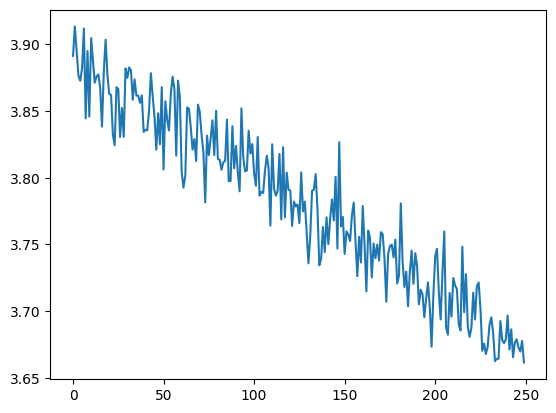

In [43]:
import matplotlib.pyplot as plt
plt.plot(loss_records)

In [44]:
summed_gradients_all = expected_gradients.sum(dim=0)

In [45]:
summed_gradients_all

tensor([-5.3778e-02,  4.5824e-02,  4.6716e-02, -9.5496e-03, -5.6577e-02,
        -4.7488e-02, -4.8782e-02,  3.0097e-02, -9.2352e-04, -7.9512e-03,
         1.2434e-02,  1.9323e-02,  2.8484e-02,  7.9832e-04,  1.8424e-01,
         1.4014e-03, -5.6535e-04,  5.0501e-02, -1.8175e-02,  9.0590e-02,
        -3.9019e-02,  2.2286e-02,  2.4149e-02, -5.2897e-02,  2.6113e-02,
        -1.3929e-01,  1.8217e-02,  8.0126e-05,  8.1815e-03, -3.5646e-02,
        -9.5064e-03, -5.8072e-02, -5.2363e-02,  7.9524e-03,  4.7876e-02,
        -2.9012e-02, -5.0062e-02, -5.0940e-03,  4.8855e-02,  4.3617e-02,
        -3.2629e-02,  2.3327e-02,  6.5534e-02,  4.2860e-02,  5.5161e-02,
        -4.7238e-02, -4.3881e-03, -1.5810e-02,  2.9740e-02,  7.3486e-03,
        -8.4174e-03, -1.6983e-02,  4.3122e-02, -2.1602e-02, -5.1927e-03,
         4.0302e-02,  5.8868e-03, -2.3812e-02, -1.9861e-01, -2.5349e-02,
         4.1592e-02,  3.8794e-02, -1.1841e-01,  9.6809e-02,  7.1350e-02,
         8.9564e-02,  2.4018e-02,  6.3765e-02, -9.1

In [46]:
avg = torch.mean(summed_gradients_all)

<ipython-input-47-7bd4b9a1dcff>:61: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
<ipython-input-47-7bd4b9a1dcff>:61: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


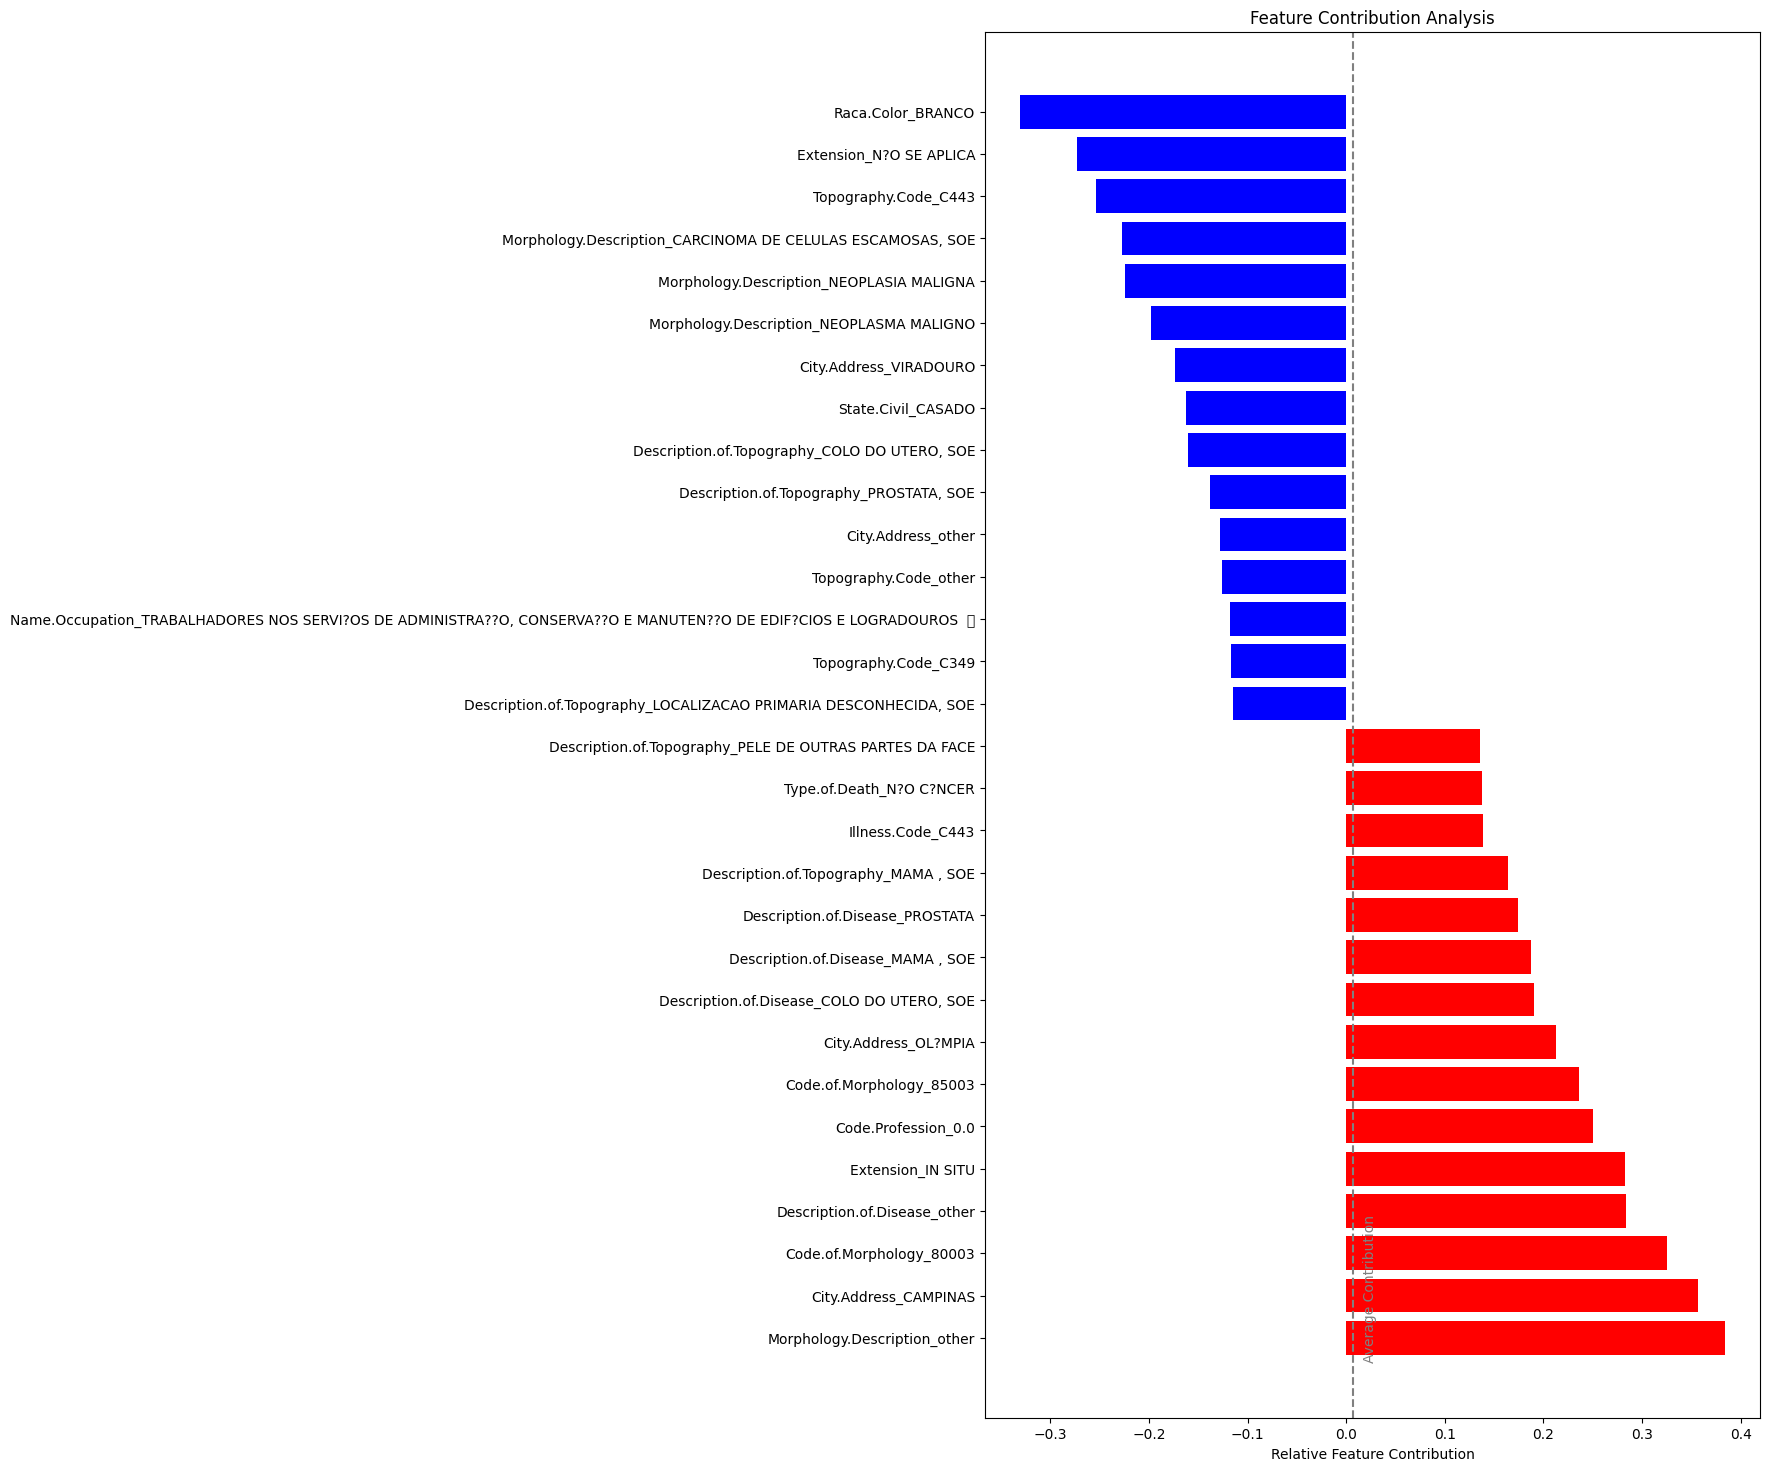

In [47]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns.tolist()
# Comment out the hard codded feature_contributions
#feature_contributions = [ 8.2754e-03,  2.4449e-01, -6.7458e-05,  5.4123e-05,  1.5575e-03,
#         3.2035e-04, -3.0248e-02,  3.2682e-03,  2.3505e-04, -2.9171e-03,
#         1.6119e-03,  4.8344e-04, -1.7238e-03, -1.1669e-03,  5.9588e-03,
#         0.0000e+00, -4.1573e-04, -5.4701e-04, -1.0473e-03, -1.4245e-03,
#        -3.0089e-04,  1.1117e-03,  7.6333e-04,  6.3784e-03,  6.1414e-04,
#        -3.7345e-03, -1.4455e-03, -3.2355e-04,  3.3533e-04,  4.6745e-04,
#        -4.3285e-04,  2.5618e-04,  1.8904e-03,  6.8282e-04, -6.9565e-04,
#        -1.4172e-03, -1.2154e-03,  8.1726e-04, -8.3177e-03, -7.5985e-04,
#        -1.1202e-03, -5.8048e-04,  1.0369e-03, -2.8469e-04,  6.7106e-03,
#         3.5879e-04, -4.2590e-05, -4.9208e-04,  7.3213e-04, -1.1677e-03,
#         5.0838e-04,  2.0164e-03, -2.9205e-04, -6.7307e-02,  9.6444e-05,
#         2.8948e-03,  1.5678e-02, -9.4986e-04,  9.6401e-06,  2.4515e-03,
#         6.6200e-04, -1.4110e-03, -1.7674e-03,  3.8453e-04, -1.9134e-03,
#        -5.4385e-04, -4.9116e-04,  6.5076e-04,  3.4984e-04, -9.6108e-04,
#         3.6344e-04,  7.8890e-04, -9.3827e-04,  6.7942e-04,  3.8333e-03,
#         7.4971e-04, -5.2135e-04,  3.9201e-04, -3.5277e-03, -3.6636e-04,
#         4.2249e-04, -1.2218e-03, -1.4330e-03,  2.0466e-03, -3.6416e-03,
#         1.8880e-04, -1.4094e-03, -5.4314e-04,  1.6829e-04,  3.3163e-03,
#        -1.2260e-04,  1.3083e-03,  2.6524e-03,  9.9954e-04, -3.5142e-03,
#         4.8810e-03, -2.5063e-04,  1.2950e-03, -4.9680e-04, -1.6306e-03,
#        -1.6315e-03, -1.3667e-03,  2.1176e-03,  6.0328e-04, -1.1989e-03,
#         2.3749e-03, -2.0358e-03, -2.0848e-03,  4.5019e-04,  1.1912e-03,
#        -1.5323e-03, -7.2216e-04, -4.4424e-04,  1.9066e-03, -3.5590e-03,
#         1.5582e-03, -1.6984e-04, -5.5106e-01,  4.0006e-01, -2.6152e-01,
#        -3.1872e-01,  2.3336e+00,  5.0189e-02,  1.7094e-02, -1.2590e+00,
#        -5.3713e-02, -4.2591e-01, -1.4865e-01, -2.4621e-03,  1.1240e-02,
#        -3.8996e-03, -2.6369e-03, -1.6012e-02,  6.2234e+00,  3.1755e+00,
#         1.2218e+01, -2.3051e-02, -5.5302e-02]



feature_contributions = summed_gradients_all.detach().cpu().tolist()


feature_contributions = feature_contributions / np.sum(feature_contributions)
sorted_indices = np.argsort(feature_contributions)[::-1]
max15_indices = sorted_indices[:15]

min15_indices = sorted_indices[-15:]

selected_indices = np.concatenate([max15_indices, min15_indices])

fig, ax = plt.subplots(figsize=(10, len(selected_indices) * 0.6))
colors = ['red' if val > 0 else 'blue' for val in feature_contributions[selected_indices]]
ax.barh(range(len(selected_indices)), feature_contributions[selected_indices], color=colors)

ax.set_yticks(range(len(selected_indices)))
ax.set_yticklabels(np.array(feature_names)[selected_indices])
ax.set_xlabel("Relative Feature Contribution")

avg_contribution = 1 / len(feature_names)
ax.axvline(avg_contribution, ls='--', color='gray')

ax.text(avg_contribution+0.01, -0.5, 'Average Contribution', color='gray', rotation='vertical')
plt.title("Feature Contribution Analysis")
plt.tight_layout()
plt.show()

## Predictions and Evaluations
- Rewrote the predictions and evaluations

In [48]:
# Created by Jingyan
model.eval()
test_predictions = []

# Disable gradient calculations
with torch.no_grad():
    for X_test, _, _, _ in test_loader:
        # Forward pass
        X_test = X_test.to(device)
        task_outputs_ = model(X_test)

        # Store the predictions
        test_predictions.append(task_outputs_)

# Process the predictions as needed
# For example, converting them to a list or concatenating
# Here we concatenate the predictions for each task
test_predictions = [torch.cat([preds[i] for preds in test_predictions]) for i in range(len(test_predictions[0]))]



In [49]:
print(len(test_predictions))
print(test_predictions[0].shape)

7
torch.Size([2048, 1])


In [50]:
# Created by Jingyan
model.eval()
train_predictions = []

# Disable gradient calculations
with torch.no_grad():
    for X_train, _, _, _ in train_loader:
        # Forward pass
        X_train = X_train.to(device)
        task_outputs_ = model(X_train)

        # Store the predictions
        train_predictions.append(task_outputs_)

# Process the predictions as needed
# For example, converting them to a list or concatenating
# Here we concatenate the predictions for each task
train_predictions = [torch.cat([preds[i] for preds in train_predictions]) for i in range(len(train_predictions[0]))]



In [51]:
print(len(train_predictions))
print(train_predictions[0].shape)

7
torch.Size([10240, 1])


In [52]:
# made by Xinyu
def binarize_and_sum_columns(output_list):
    def binarize_list(input_list):
        tensor = torch.Tensor(input_list)
        # print(input_list.max() == input_list.min())
        binary_tensor = (tensor >= 0.5).float()
        return binary_tensor

    result = binarize_list(output_list[0])
    for i in range(1, len(output_list)):
        binary_column = binarize_list(output_list[i])
        print(binary_column.max() == binary_column.min())
        result += binary_column

    return result


In [53]:
# made by Xinyu
Y_hat_train = binarize_and_sum_columns(train_predictions)
Y_hat_train = Y_hat_train.squeeze()
print(Y_hat_train.shape)

Y_hat_test = binarize_and_sum_columns(test_predictions)
Y_hat_test = Y_hat_test.squeeze()
print(Y_hat_test.shape)

tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
torch.Size([10240])
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
torch.Size([2048])


In [54]:
# created by Jingyan
# Get the true labels and status
train_trues = []
train_statuses = []
for _, train_targets, train_masks, train_status in train_loader:
    true_label = [train_targets[i]*train_masks[i] for i in range(len(train_targets))]
    train_trues.append(true_label)
    train_statuses.append(train_status)
train_trues = [torch.cat([preds[i] for preds in train_trues]) for i in range(len(train_trues[0]))]
train_statuses = torch.cat([status for status in train_statuses])

print(len(train_trues))
print(train_trues[0].shape)
print(train_statuses.shape)

test_trues = []
test_statuses = []
for _, test_targets, test_masks, test_status in test_loader:
    true_label = [test_targets[i]*test_masks[i] for i in range(len(test_targets))]
    test_trues.append(true_label)
    test_statuses.append(test_status)

test_trues = [torch.cat([preds[i] for preds in test_trues]) for i in range(len(test_trues[0]))]
test_statuses = torch.cat([status for status in test_statuses])

print(len(test_trues))
print(test_trues[0].shape)
print(test_statuses.shape)

7
torch.Size([10240, 1])
torch.Size([10240])
7
torch.Size([2048, 1])
torch.Size([2048])


In [55]:
# made by Xinyu
Y_true_train = binarize_and_sum_columns(train_trues)
Y_true_train = Y_true_train.squeeze()
print(Y_true_train.shape)

Y_true_test = binarize_and_sum_columns(test_trues)
Y_true_test = Y_true_test.squeeze()
print(Y_true_test.shape)

tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
torch.Size([10240])
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
torch.Size([2048])


In [ ]:
# made by Xinyu
# Modifed by Jingyan: adjusted for cencored data following Dr. Li's code
# https://github.com/yanlirock/Multi-task_Survival_Analysis/blob/6cda8883a240b789ef38be891909a2bae15f4623/functions/getcindex_cox.m#L1

class Cindex(torch.nn.Module):
    def __init__(self):
        super(Cindex, self).__init__()

    def forward(self, y, y_hat, status):
        if not torch.is_tensor(y):
            y = torch.Tensor(y)
        if not torch.is_tensor(y_hat):
            y_hat = torch.Tensor(y_hat)
        if not torch.is_tensor(status):
          status = torch.Tensor(status)

        N = y.size(0)
        total_pairs = 0
        c = 0

        for i in range(N):
            for j in range(i + 1, N):
                a = y[i]
                b = y[j]
                a_hat = y_hat[i]
                b_hat = y_hat[j]
                astatus = status[i]
                bstatus = status[j]
                if (a >= b and a_hat >= b_hat and bstatus == 1) or (a <= b and a_hat <= b_hat and astatus == 1):
                    c += 1
                if (a <= b and astatus==1) or (b <= a and bstatus == 1):
                    total_pairs += 1

        outcome = c / total_pairs
        return outcome

cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train, train_statuses)
print(c11_train)
c11_test = cindex_calculator(Y_true_test, Y_hat_test, test_statuses)
print(c11_test)
#According to the way in your paper
# c = 1 / num * Σi=1^num Σj>i [yj > yi * I[S(^yj|Xj) > S(^yi|Xi)]]

In [ ]:
# 0.7103323579075326
# 0.7193680369479399
# 56mins

In [ ]:
# c11_train = 0.8174466628004992
# c11_test = 0.8137755363531064

I have modified the c-index according to Dr. Li's github code, we might not need the following part. (Jingyan)

In [56]:
# made by Xinyu
# For this Cindex, it seems that
# it does not take the censored data into account,
# should we adjust for censored data?
class Cindex(torch.nn.Module):
    def __init__(self):
        super(Cindex, self).__init__()

    def forward(self, y, y_hat):
        if not torch.is_tensor(y):
            y = torch.Tensor(y)
        if not torch.is_tensor(y_hat):
            y_hat = torch.Tensor(y_hat)

        N = y.size(0)
        total_pairs = N * (N - 1) / 2
        c = 0

        for i in range(N):
            for j in range(i + 1, N):
                a = y[i]
                b = y[j]
                a_hat = y_hat[i]
                b_hat = y_hat[j]

                if (a >= b and a_hat >= b_hat) or (a <= b and a_hat <= b_hat):
                    c += 1

        outcome = c / total_pairs
        return outcome

cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train)
c11_test = cindex_calculator(Y_true_test, Y_hat_test)

#According to the way in your paper
# c = 1 / num * Σi=1^num Σj>i [yj > yi * I[S(^yj|Xj) > S(^yi|Xi)]]

In [57]:
print(c11_train)
print(c11_test)

0.803529511854185
0.8058930561492428


In [ ]:
class Cindex(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y, y_hat, status):

        status_matrix = status.repeat(status.size(0), 1)
        cmp_mask = (y.repeat(status.size(0), 1) - y) * (status_matrix - status_matrix.t())
        concordant = torch.where(
            (y_hat.repeat(status.size(0), 1) - y_hat) * cmp_mask > 0,
            torch.ones_like(cmp_mask), torch.zeros_like(cmp_mask))

        total_pairs = torch.where(
            cmp_mask !=0,
            torch.ones_like(cmp_mask), torch.zeros_like(cmp_mask))

        return concordant.sum() / total_pairs.sum()

In [ ]:
cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train, train_statuses)

In [ ]:
c11_train

In [ ]:
Y_test_train = Y_true_train.cuda(0)
Y_hat_train = Y_hat_train.cuda(0)
train_statuses = train_statuses.cuda(0)